# R-Q

## imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sqlite3

/root/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import cymetric as cym
from cymetric import graphs
from cymetric import timeseries

# palette = ['#67a9cf', '#ef8a62']
palette = [
    '#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377',
    '#222255', '#225555', '#225522', '#666633', '#663333',
    '#BBBBBB', '#555555'] #['#507fb5', '#b5507f', '#7fb550', '#b58650']

In [3]:
fig_params = {'axes.labelsize': 11.5,
              'font.family': 'serif',
              'font.size': 10,
              'legend.fontsize': 11,
              'xtick.labelsize': 10.5,
              'ytick.labelsize': 11,
              'figure.figsize': [9, 6],
              'figure.titlesize': 14.5,
              'savefig.format': 'png',
              'savefig.bbox': 'tight'}
plt.rcParams.update(fig_params)

#palette = []
#sns.set_palette(sns.comor_palette(palette))

## utils
- includes behavior and default (no behavior) as comparison

In [4]:
def get_data(file):
    db = cym.dbopen(file)
    evaler = cym.Evaluator(db)
    
    name = os.path.splitext(file)[0]
    
    tr = evaler.eval('Transactions')
    resources = evaler.eval('Resources')
    transactions = pd.merge(resources, tr, on=['SimId', 'ResourceId'], how='inner')
    agents = evaler.eval('Agents')
    ei = evaler.eval('ExplicitInventory')
    
    storage_id = agents.loc[agents["Prototype"] == "Storage"]["AgentId"]
    transaction_received = transactions.loc[transactions["ReceiverId"] == storage_id.item()]
    transaction_sent = transactions.loc[transactions["SenderId"] == storage_id.item()]
    
    data = {'ev': evaler,
            'agents': agents,
            'transactions': transactions,
            't_r': transaction_received,
            't_s': transaction_sent,
            'ei': ei}
    
    return name, data

## input file names below

In [5]:
filenames = ['no-behavior.sqlite', 'R-Q.sqlite', 's-S.sqlite']

## grab all data

In [6]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file)
    data[name] = file_data

In [7]:
data['s-S']['t_s']

,SimId,ResourceId,ObjId,Type,TimeCreated,Quantity,Units,QualId,Parent1,Parent2,TransactionId,SenderId,ReceiverId,Commodity,Time
1,0c65ea50-d326-4c7f-a87b-20c22803c65c,11,8,Material,1,2.609284,kg,1,6,0,1,13,14,commodity1,1
2,0c65ea50-d326-4c7f-a87b-20c22803c65c,16,11,Material,2,1.086158,kg,1,10,0,2,13,14,commodity1,2
3,0c65ea50-d326-4c7f-a87b-20c22803c65c,21,14,Material,3,3.167860,kg,1,15,0,3,13,14,commodity1,3
4,0c65ea50-d326-4c7f-a87b-20c22803c65c,25,5,Material,4,1.011013,kg,1,20,0,6,13,14,commodity1,5
5,0c65ea50-d326-4c7f-a87b-20c22803c65c,26,17,Material,4,4.125685,kg,1,20,0,4,13,14,commodity1,4
7,0c65ea50-d326-4c7f-a87b-20c22803c65c,38,26,Material,6,1.970523,kg,1,33,0,7,13,14,commodity1,6
8,0c65ea50-d326-4c7f-a87b-20c22803c65c,43,29,Material,7,2.930335,kg,1,37,0,8,13,14,commodity1,7
9,0c65ea50-d326-4c7f-a87b-20c22803c65c,47,23,Material,8,1.918119,kg,1,42,0,11,13,14,commodity1,9
10,0c65ea50-d326-4c7f-a87b-20c22803c65c,48,32,Material,8,4.170009,kg,1,42,0,9,13,14,commodity1,8
12,0c65ea50-d326-4c7f-a87b-20c22803c65c,60,41,Material,10,3.617436,kg,1,55,0,12,13,14,commodity1,10


# Plots
## transactions subplots

In [8]:
data['no-behavior']['t_r']

,SimId,ResourceId,ObjId,Type,TimeCreated,Quantity,Units,QualId,PackageName,Parent1,Parent2,TransactionId,SenderId,ReceiverId,Commodity,Time
0,21bacee2-09b6-4be9-b87f-e327617ee58c,8,6,Material,0,12.000000,kg,1,unpackaged,6,0,0,17,18,commodity,0
2,21bacee2-09b6-4be9-b87f-e327617ee58c,21,15,Material,2,2.609284,kg,1,unpackaged,19,0,2,17,18,commodity,2
4,21bacee2-09b6-4be9-b87f-e327617ee58c,32,22,Material,3,1.086158,kg,1,unpackaged,30,0,4,17,18,commodity,3
6,21bacee2-09b6-4be9-b87f-e327617ee58c,43,29,Material,4,3.167860,kg,1,unpackaged,41,0,6,17,18,commodity,4
8,21bacee2-09b6-4be9-b87f-e327617ee58c,54,36,Material,5,4.125685,kg,1,unpackaged,52,0,8,17,18,commodity,5
10,21bacee2-09b6-4be9-b87f-e327617ee58c,67,43,Material,6,4.221732,kg,1,unpackaged,65,0,10,17,18,commodity,6
12,21bacee2-09b6-4be9-b87f-e327617ee58c,79,50,Material,7,1.970523,kg,1,unpackaged,77,0,12,17,18,commodity,7
14,21bacee2-09b6-4be9-b87f-e327617ee58c,91,57,Material,8,2.930335,kg,1,unpackaged,89,0,14,17,18,commodity,8
16,21bacee2-09b6-4be9-b87f-e327617ee58c,103,64,Material,9,4.170009,kg,1,unpackaged,101,0,16,17,18,commodity,9
18,21bacee2-09b6-4be9-b87f-e327617ee58c,115,71,Material,10,4.213143,kg,1,unpackaged,113,0,18,17,18,commodity,10


In [9]:
# fig = plt.figure(figsize = (8, 6))

# ax = fig.add_subplot(111)
# ax.set_xlabel('Time (step)')
# ax.set_ylabel('Quantity of Material Received (kg)')
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

# ax0 = fig.add_subplot(211)
# # ax.set_xlabel('Time')
# # ax.set_ylabel('Quantity Received')
# # plt.xlim(-0.5,16)
# # plt.ylim(0,9)
# # ax0.set_xticks(np.arange(0, 16, 2))
# # ax0.set_yticks(np.arange(0, 10, 2.5))

# ax0.scatter(data['no-behavior']['t_r']['Time'],
#             data['no-behavior']['t_r']['Quantity'],
#             color= 'k')
# ax0.set_title('Default storage behavior')

# ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)

# ax1.scatter(data['R-Q']['t_r']['Time'],
#             data['R-Q']['t_r']['Quantity'],
#             color= 'k')
# ax1.set_title('(R,Q) inventory policy')

# fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
# fig.tight_layout()

# #plt.savefig('plots/transactions-subplots', transparent=True)

## Cumulative received subplots

In [10]:
# data['no-behavior']['t_r']['CumQuant'] = data['no-behavior']['t_r']['Quantity'].cumsum()
# data['R-Q']['t_r']['CumQuant'] = data['R-Q']['t_r']['Quantity'].cumsum()

In [11]:
# fig = plt.figure(figsize = (8, 6))

# ax = fig.add_subplot(111)
# ax.set_xlabel('Time (step)')
# ax.set_ylabel('Cumulative Material Received (kg)')
# ax.spines['top'].set_color('none')
# ax.spines['bottom'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['right'].set_color('none')
# ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

# ax0 = fig.add_subplot(211)
# # ax.set_xlabel('Time')
# # ax.set_ylabel('Quantity Received')
# plt.xlim(-0.5,16)
# plt.ylim(0,60)
# ax0.set_xticks(np.arange(0, 16, 2))
# ax0.set_yticks(np.arange(0, 61, 10))


# ax0.step(data['no-behavior']['t_r']['Time'],
#          data['no-behavior']['t_r']['CumQuant'],
#          color= 'k')
# ax0.set_title('default')

# ax1 = fig.add_subplot(212, sharex=ax0, sharey=ax0)


# ax1.step(data['R-Q']['t_r']['Time'],
#          data['R-Q']['t_r']['CumQuant'],
#          color= 'k')
# ax1.set_title('R-Q')

# fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
# fig.tight_layout()

# #plt.savefig('plots/cumulative-subplots', transparent=True)


## Cumulative single plot

In [13]:
# fig = plt.figure(figsize = (7, 5))

# ax = fig.add_subplot(111)
# ax.set_xlabel('Time (step)')
# ax.set_ylabel('Cumulative Material Received (kg)')

# plt.xlim(-0.5,16.5)
# plt.ylim(0,105)
# ax.set_xticks(np.arange(0, 17, 2))
# ax.set_yticks(np.arange(0, 101, 25))


# ax.step(data['no-behavior']['t_r']['Time'],
#         data['no-behavior']['t_r']['CumQuant'],
#         where='pre',
#         color= '0.6', ls='dashed', label='Default storage behavior')

# ax.step(data['R-Q']['t_r']['Time'],
#         data['R-Q']['t_r']['CumQuant'],
#         where='pre',
#         color= 'k', label='Fixed 5-on, 2-off behavior')

# ax.legend(loc = 'upper left')

# plt.title('Fixed Active and Dormant Periods')

# #plt.savefig('plots/cumulative-oneplot', transparent=True)

# In and out plots

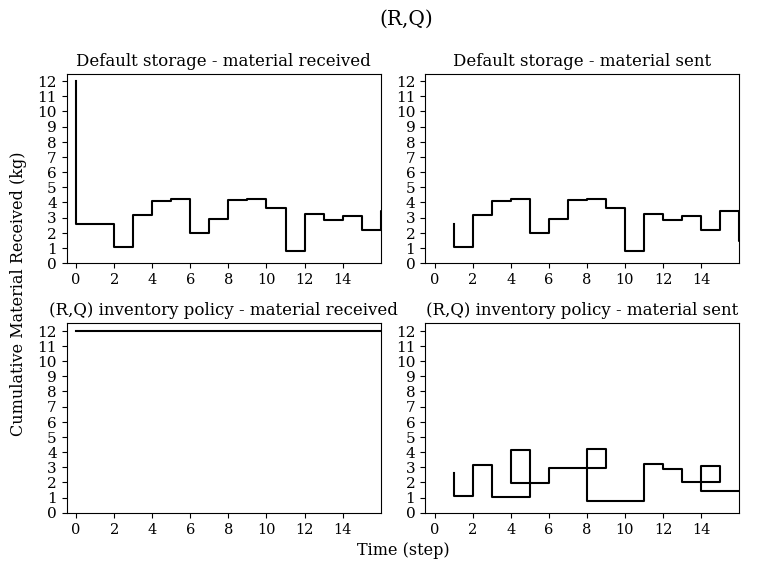

In [14]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(221)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,12.5)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 13, 1))


ax0.step(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['Quantity'],
         color= 'k')
ax0.set_title('Default storage - material received')

#
# upper right - nobehav out
ax1 = fig.add_subplot(222, sharex=ax0, sharey=ax0)

ax1.step(data['no-behavior']['t_s']['Time'],
         data['no-behavior']['t_s']['Quantity'],
         color= 'k')
ax1.set_title('Default storage - material sent')

#
# lower levt - behav in
ax2 = fig.add_subplot(223, sharex=ax0, sharey=ax0)

ax2.step(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['Quantity'],
         color= 'k')
ax2.set_title('(R,Q) inventory policy - material received')

#
# lower right - behav out
ax3 = fig.add_subplot(224, sharex=ax0, sharey=ax0)

ax3.step(data['R-Q']['t_s']['Time'],
         data['R-Q']['t_s']['Quantity'],
         color= 'k')
ax3.set_title('(R,Q) inventory policy - material sent')
#plt.savefig('plots/in-and-out', transparent=True)

fig.suptitle('(R,Q)', x=0.55)
fig.tight_layout()



# Inventory plots
## get net (in positive, out neg

In [15]:
data['no-behavior']['transactions']['Net'] = np.where(
    data['no-behavior']['transactions']['ReceiverId']==18,
    data['no-behavior']['transactions']['Quantity'],
    -data['no-behavior']['transactions']['Quantity']
)

data['R-Q']['transactions']['Net'] = np.where(
    data['R-Q']['transactions']['ReceiverId']==13,
    data['R-Q']['transactions']['Quantity'],
    -data['R-Q']['transactions']['Quantity']
)

data['s-S']['transactions']['Net'] = np.where(
    data['s-S']['transactions']['ReceiverId']==13,
    data['s-S']['transactions']['Quantity'],
    -data['s-S']['transactions']['Quantity']
)



In [16]:
data['s-S']['transactions'].head(9)

,SimId,ResourceId,ObjId,Type,TimeCreated,Quantity,Units,QualId,Parent1,Parent2,TransactionId,SenderId,ReceiverId,Commodity,Time,Net
0,0c65ea50-d326-4c7f-a87b-20c22803c65c,6,5,Material,0,12.000000,kg,1,0,0,0,12,13,commodity,0,12.000000
1,0c65ea50-d326-4c7f-a87b-20c22803c65c,11,8,Material,1,2.609284,kg,1,6,0,1,13,14,commodity1,1,-2.609284
2,0c65ea50-d326-4c7f-a87b-20c22803c65c,16,11,Material,2,1.086158,kg,1,10,0,2,13,14,commodity1,2,-1.086158
3,0c65ea50-d326-4c7f-a87b-20c22803c65c,21,14,Material,3,3.167860,kg,1,15,0,3,13,14,commodity1,3,-3.167860
4,0c65ea50-d326-4c7f-a87b-20c22803c65c,25,5,Material,4,1.011013,kg,1,20,0,6,13,14,commodity1,5,-1.011013
5,0c65ea50-d326-4c7f-a87b-20c22803c65c,26,17,Material,4,4.125685,kg,1,20,0,4,13,14,commodity1,4,-4.125685
6,0c65ea50-d326-4c7f-a87b-20c22803c65c,33,23,Material,5,10.988987,kg,1,0,0,5,12,13,commodity,5,10.988987
7,0c65ea50-d326-4c7f-a87b-20c22803c65c,38,26,Material,6,1.970523,kg,1,33,0,7,13,14,commodity1,6,-1.970523
8,0c65ea50-d326-4c7f-a87b-20c22803c65c,43,29,Material,7,2.930335,kg,1,37,0,8,13,14,commodity1,7,-2.930335


## get net per time

In [17]:
data['no-behavior']['Net'] = pd.DataFrame(
    data['no-behavior']['transactions'].groupby('Time')['Net'].sum().cumsum(), columns=['Net']).reset_index()

data['R-Q']['Net'] = pd.DataFrame(
    data['R-Q']['transactions'].groupby('Time')['Net'].sum().cumsum(), columns=['Net']).reset_index()

data['s-S']['Net'] = pd.DataFrame(
    data['s-S']['transactions'].groupby('Time')['Net'].sum().cumsum(), columns=['Net']).reset_index()

In [18]:
data['s-S']['transactions'].loc[data['s-S']['transactions']['Time'] == 4]

,SimId,ResourceId,ObjId,Type,TimeCreated,Quantity,Units,QualId,Parent1,Parent2,TransactionId,SenderId,ReceiverId,Commodity,Time,Net
5,0c65ea50-d326-4c7f-a87b-20c22803c65c,26,17,Material,4,4.125685,kg,1,20,0,4,13,14,commodity1,4,-4.125685


In [19]:
data['s-S']['transactions'].groupby('Time')['Net'].sum()

Time
0     12.000000
1     -2.609284
2     -1.086158
3     -3.167860
4     -4.125685
5      9.977973
6     -1.970523
7     -2.930335
8     -4.170009
9      8.163761
10    -3.617436
11    -0.776369
12    -3.206106
13    -2.481969
14    12.000000
15    -2.197548
16    -3.407038
17    -1.434885
18    -4.089362
19    10.257665
Name: Net, dtype: float64

## up-down bar plots RQ only

Text(0.55, 0.98, 'Fixed Active and Dormant Periods')

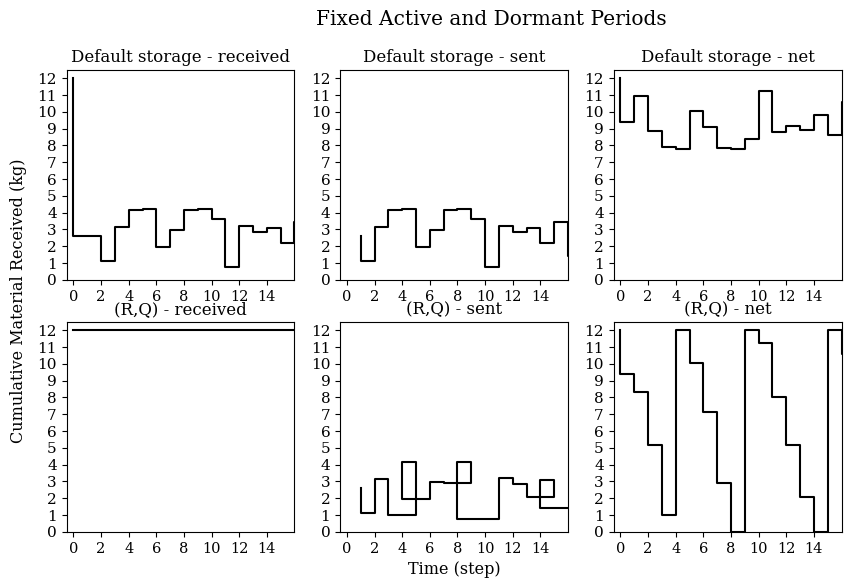

In [20]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(231)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,12.5)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 13, 1))


ax0.step(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['Quantity'],
         color= 'k')
ax0.set_title('Default storage - received')

#
# upper middle - nobehav out
ax1 = fig.add_subplot(232, sharex=ax0, sharey=ax0)

ax1.step(data['no-behavior']['t_s']['Time'],
         data['no-behavior']['t_s']['Quantity'],
         color= 'k')
ax1.set_title('Default storage - sent')

#
# upper right - nobehav out
ax2 = fig.add_subplot(233, sharex=ax0, sharey=ax0)

ax2.step(data['no-behavior']['Net']['Time'],
         data['no-behavior']['Net']['Net'],
         color= 'k')
ax2.set_title('Default storage - net')

#
# lower levt - behav in
ax3 = fig.add_subplot(234, sharex=ax0, sharey=ax0)

ax3.step(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['Quantity'],
         color= 'k')
ax3.set_title('(R,Q) - received')

#
# lower middle - behav out
ax4 = fig.add_subplot(235, sharex=ax0, sharey=ax0)

ax4.step(data['R-Q']['t_s']['Time'],
         data['R-Q']['t_s']['Quantity'],
         color= 'k')
ax4.set_title('(R,Q) - sent')

#
# lower right - behav net
ax4 = fig.add_subplot(236, sharex=ax0, sharey=ax0)

ax4.step(data['R-Q']['Net']['Time'],
         data['R-Q']['Net']['Net'],
         color= 'k')
ax4.set_title('(R,Q) - net')

#
#
#plt.savefig('plots/in-and-out', transparent=True)

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
#fig.tight_layout()



Text(0.55, 0.98, 'Fixed Active and Dormant Periods')

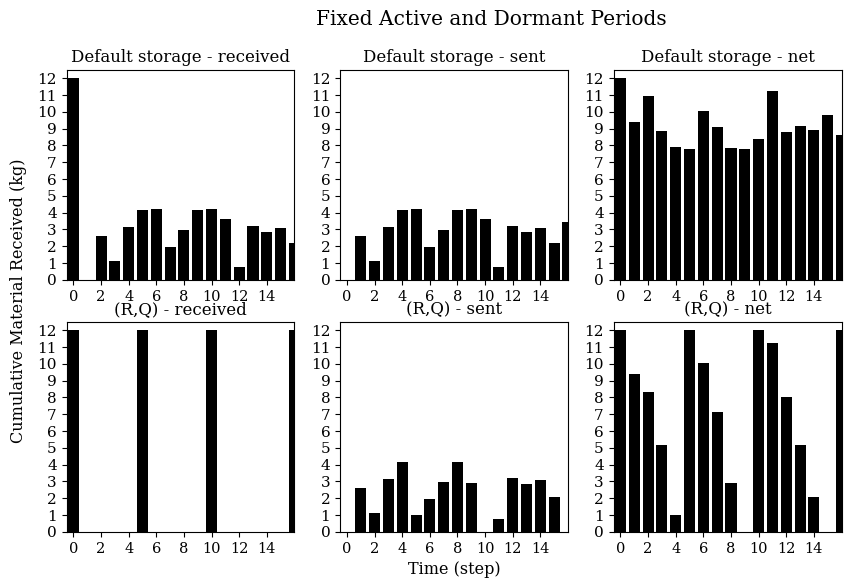

In [21]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(231)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,12.5)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 13, 1))


ax0.bar(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['Quantity'],
         color= 'k')
ax0.set_title('Default storage - received')

#
# upper middle - nobehav out
ax1 = fig.add_subplot(232, sharex=ax0, sharey=ax0)

ax1.bar(data['no-behavior']['t_s']['Time'],
         data['no-behavior']['t_s']['Quantity'],
         color= 'k')
ax1.set_title('Default storage - sent')

#
# upper right - nobehav out
ax2 = fig.add_subplot(233, sharex=ax0, sharey=ax0)

ax2.bar(data['no-behavior']['Net']['Time'],
         data['no-behavior']['Net']['Net'],
         color= 'k')
ax2.set_title('Default storage - net')

#
# lower levt - behav in
ax3 = fig.add_subplot(234, sharex=ax0, sharey=ax0)

ax3.bar(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['Quantity'],
         color= 'k')
ax3.set_title('(R,Q) - received')

#
# lower middle - behav out
ax4 = fig.add_subplot(235, sharex=ax0, sharey=ax0)

ax4.bar(data['R-Q']['t_s']['Time'],
         data['R-Q']['t_s']['Quantity'],
         color= 'k')
ax4.set_title('(R,Q) - sent')

#
# lower right - behav net
ax4 = fig.add_subplot(236, sharex=ax0, sharey=ax0)

ax4.bar(data['R-Q']['Net']['Time'],
         data['R-Q']['Net']['Net'],
         color= 'k')
ax4.set_title('(R,Q) - net')

#
#
#plt.savefig('plots/in-and-out', transparent=True)

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
#fig.tight_layout()



Text(0.515, 0.98, '(R,Q) inventory policy')

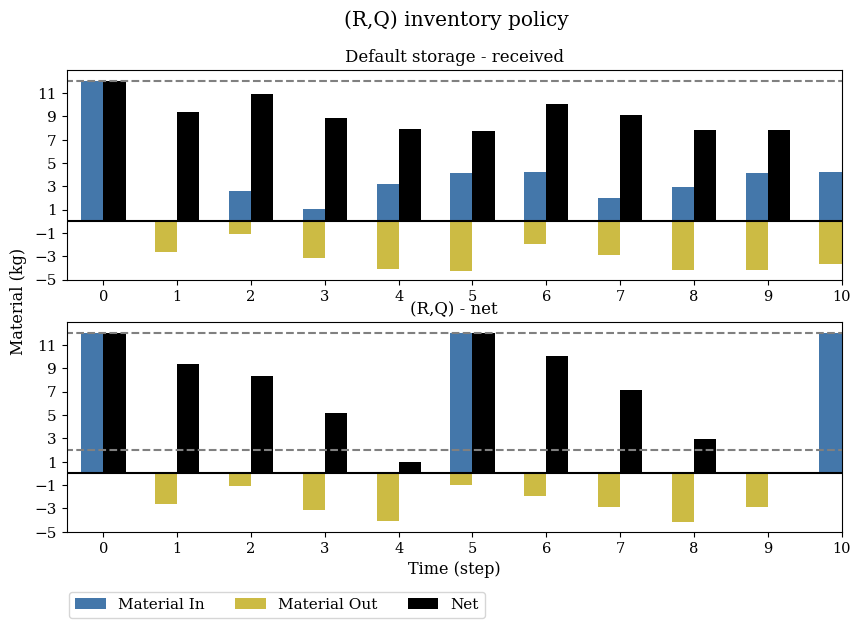

In [22]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Material (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(211)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,10)
plt.ylim(-5,13)
ax0.set_xticks(np.arange(0, 11, 1))
ax0.set_yticks(np.arange(-5, 13, 2))

ax0.hlines(y=[0,12], xmin=-2,xmax=11, colors=['k', 'gray'], linestyles=['solid', 'dashed'])

ax0.bar(data['no-behavior']['t_r']['Time']-0.15,
         data['no-behavior']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax0.set_title('Default storage - received')

ax0.bar(data['no-behavior']['t_s']['Time']-0.15,
         -data['no-behavior']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)


ax0.bar(data['no-behavior']['Net']['Time']+0.15,
         data['no-behavior']['Net']['Net'],
         color= 'k',
       label='net',
       width=0.3)


# #
# # lower levt - behav in
ax3 = fig.add_subplot(212, sharex=ax0, sharey=ax0)

ax3.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'], label='_nolegend_')

ax3.bar(data['R-Q']['t_r']['Time']-0.15,
         data['R-Q']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax3.set_title('(R,Q) - received')

#
# lower middle - behav out
ax3.bar(data['R-Q']['t_s']['Time']-0.15,
         -data['R-Q']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)
ax3.set_title('(R,Q) - sent')

#
# lower right - behav net
ax3.bar(data['R-Q']['Net']['Time']+0.15,
         data['R-Q']['Net']['Net'],
         color= 'k',
       label='net',
       width=0.3)

ax3.set_title('(R,Q) - net')

ax3.legend(['Material In', 'Material Out', 'Net'], ncol=3, fancybox=True, bbox_to_anchor=(0.55,-0.25))
#
#
#plt.savefig('plots/in-and-out', transparent=True)

fig.suptitle('(R,Q) inventory policy', x=0.515)
#fig.tight_layout()



## up down plots with s-S 

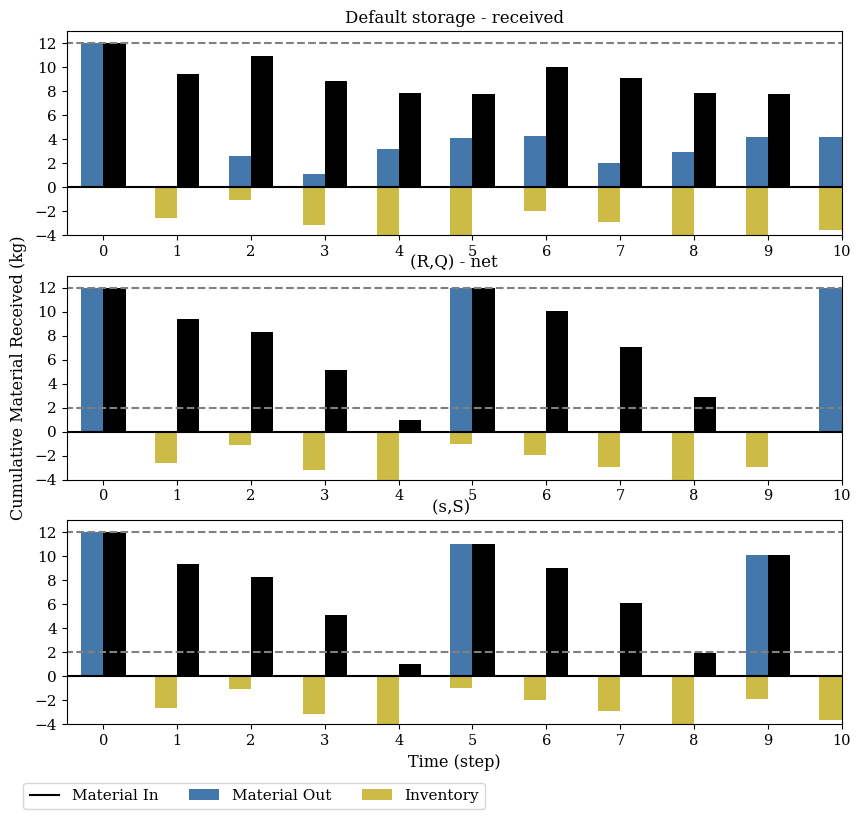

In [23]:
fig = plt.figure(figsize = (10, 9))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(311)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,10)
plt.ylim(-4,13)
ax0.set_xticks(np.arange(0, 11, 1))
ax0.set_yticks(np.arange(-4, 13, 2))

ax0.hlines(y=[0,12], xmin=-2,xmax=11, colors=['k', 'gray'], linestyles=['solid', 'dashed'])

ax0.bar(data['no-behavior']['t_r']['Time']-0.15,
         data['no-behavior']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax0.set_title('Default storage - received')

ax0.bar(data['no-behavior']['t_s']['Time']-0.15,
         -data['no-behavior']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)


ax0.bar(data['no-behavior']['Net']['Time']+0.15,
         data['no-behavior']['Net']['Net'],
         color= 'k',
       label='net',
       width=0.3)


# #
# # behav in
ax1 = fig.add_subplot(312, sharex=ax0, sharey=ax0)

ax1.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'])

ax1.bar(data['R-Q']['t_r']['Time']-0.15,
         data['R-Q']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax1.set_title('(R,Q) - received')

#
# behav out
ax1.bar(data['R-Q']['t_s']['Time']-0.15,
         -data['R-Q']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)
ax1.set_title('(R,Q) - sent')

#
# behav net
ax1.bar(data['R-Q']['Net']['Time']+0.15,
         data['R-Q']['Net']['Net'],
         color= 'k',
       label='net',
       width=0.3)

ax1.set_title('(R,Q) - net')

#
# #
# # behav in
ax2 = fig.add_subplot(313, sharex=ax0, sharey=ax0)

ax2.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'])

ax2.bar(data['s-S']['t_r']['Time']-0.15,
         data['s-S']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
#ax2.set_title('(s,S) - received')

#
# behav out
ax2.bar(data['s-S']['t_s']['Time']-0.15,
         -data['s-S']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)
#ax2.set_title('(s,S) - sent')

#
# behav net
ax2.bar(data['s-S']['Net']['Time']+0.15,
         data['s-S']['Net']['Net'],
         color= 'k',
       label='net',
       width=0.3)

ax2.set_title('(s,S) ')

ax2.legend(['Material In', 'Material Out', 'Inventory'], ncol=3, fancybox=True, bbox_to_anchor=(0.55,-0.25))
#
#
#plt.savefig('plots/in-and-out', transparent=True)

#fig.suptitle('(R,Q) inventory policy', x=0.515)
#fig.tight_layout()



### ANS fig

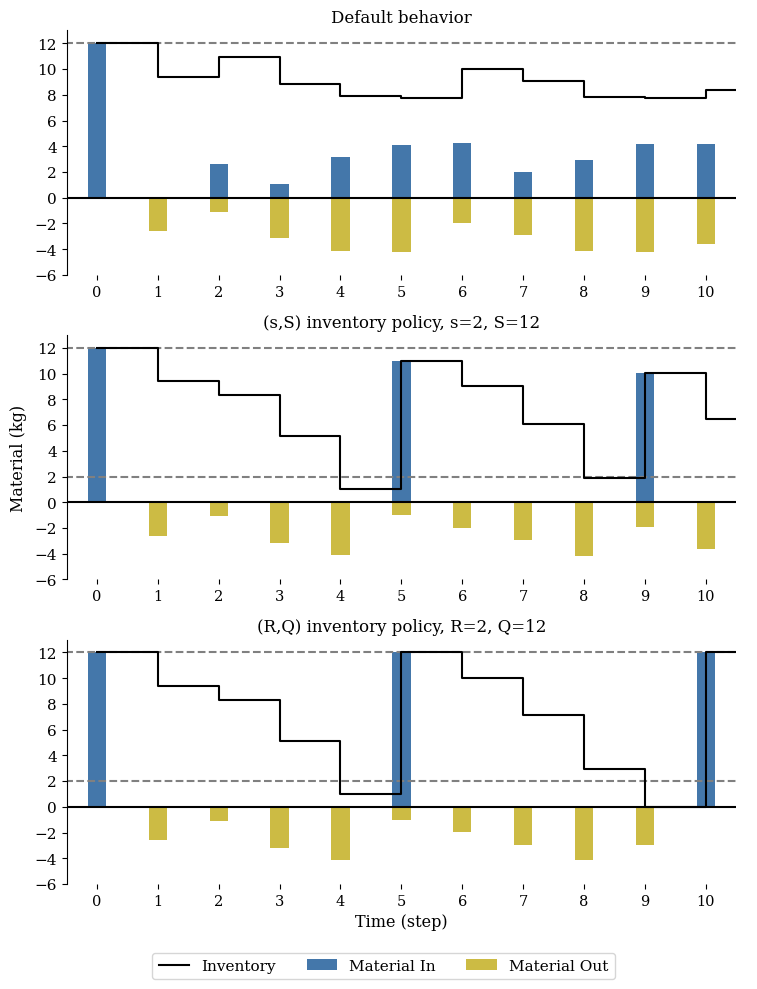

In [55]:
fig = plt.figure(figsize = (8, 10.5))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Material (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='none', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(311)
# ax0.set_xlabel('Time (step)')
# ax0.set_ylabel('Material (kg)')
plt.xlim(-0.5,10.5)
plt.ylim(-6,13)
ax0.set_xticks(np.arange(0, 11, 1))
ax0.set_yticks(np.arange(-6, 13, 2))

ax0.spines['top'].set_color('none')
ax0.spines['bottom'].set_color('none')
ax0.spines['right'].set_color('none')

ax0.hlines(y=[0,12], xmin=-2,xmax=11, colors=['k', 'gray'], linestyles=['solid', 'dashed'], label='_nolegend_')

ax0.bar(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax0.set_title('Default behavior')

ax0.bar(data['no-behavior']['t_s']['Time'],
         -data['no-behavior']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)


ax0.step(data['no-behavior']['Net']['Time'],
         data['no-behavior']['Net']['Net'],
         where='post',
         color= 'k')


# #
# # behav in
ax1 = fig.add_subplot(313, sharex=ax0, sharey=ax0)
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['right'].set_color('none')

ax1.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'], label='_nolegend_')

ax1.bar(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax1.set_title('(R,Q) - received')

#
# behav out
ax1.bar(data['R-Q']['t_s']['Time'],
         -data['R-Q']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)
ax1.set_title('(R,Q) - sent')

#
# behav net
ax1.step(data['R-Q']['Net']['Time'],
         data['R-Q']['Net']['Net'],
         where='post',
         color= 'k')

ax1.set_title('(R,Q) inventory policy, R=2, Q=12')

#
# #
# # behav in
ax2 = fig.add_subplot(312, sharex=ax0, sharey=ax0)
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['right'].set_color('none')

ax2.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'], label='_nolegend_')

ax2.bar(data['s-S']['t_r']['Time'],
         data['s-S']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
#ax2.set_title('(s,S) - received')

#
# behav out
ax2.bar(data['s-S']['t_s']['Time'],
         -data['s-S']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)
#ax2.set_title('(s,S) - sent')

#
# behav net
ax2.step(data['s-S']['Net']['Time'],
         data['s-S']['Net']['Net'],
         where='post',
         color= 'k')

ax2.set_title('(s,S) inventory policy, s=2, S=12')

ax1.legend(['Inventory', 'Material In', 'Material Out', 'Inventory'], ncol=3,
           fancybox=True, bbox_to_anchor=(0.83,-0.25))
#
#

#fig.suptitle('(R,Q) inventory policy', x=0.515)
fig.tight_layout()

plt.savefig('plots/comparing-default-RQ-sS-ans', transparent=True, dpi=600)



In [25]:
data['s-S']['t_s']

,SimId,ResourceId,ObjId,Type,TimeCreated,Quantity,Units,QualId,Parent1,Parent2,TransactionId,SenderId,ReceiverId,Commodity,Time
1,0c65ea50-d326-4c7f-a87b-20c22803c65c,11,8,Material,1,2.609284,kg,1,6,0,1,13,14,commodity1,1
2,0c65ea50-d326-4c7f-a87b-20c22803c65c,16,11,Material,2,1.086158,kg,1,10,0,2,13,14,commodity1,2
3,0c65ea50-d326-4c7f-a87b-20c22803c65c,21,14,Material,3,3.167860,kg,1,15,0,3,13,14,commodity1,3
4,0c65ea50-d326-4c7f-a87b-20c22803c65c,25,5,Material,4,1.011013,kg,1,20,0,6,13,14,commodity1,5
5,0c65ea50-d326-4c7f-a87b-20c22803c65c,26,17,Material,4,4.125685,kg,1,20,0,4,13,14,commodity1,4
7,0c65ea50-d326-4c7f-a87b-20c22803c65c,38,26,Material,6,1.970523,kg,1,33,0,7,13,14,commodity1,6
8,0c65ea50-d326-4c7f-a87b-20c22803c65c,43,29,Material,7,2.930335,kg,1,37,0,8,13,14,commodity1,7
9,0c65ea50-d326-4c7f-a87b-20c22803c65c,47,23,Material,8,1.918119,kg,1,42,0,11,13,14,commodity1,9
10,0c65ea50-d326-4c7f-a87b-20c22803c65c,48,32,Material,8,4.170009,kg,1,42,0,9,13,14,commodity1,8
12,0c65ea50-d326-4c7f-a87b-20c22803c65c,60,41,Material,10,3.617436,kg,1,55,0,12,13,14,commodity1,10


### dis

In [26]:
data['no-behavior']['Net']

,Time,Net
0,0,12.000000
1,1,9.390716
2,2,10.913842
3,3,8.832140
4,4,7.874315
5,5,7.778268
6,6,10.029477
7,7,9.069665
8,8,7.829991
9,9,7.786857


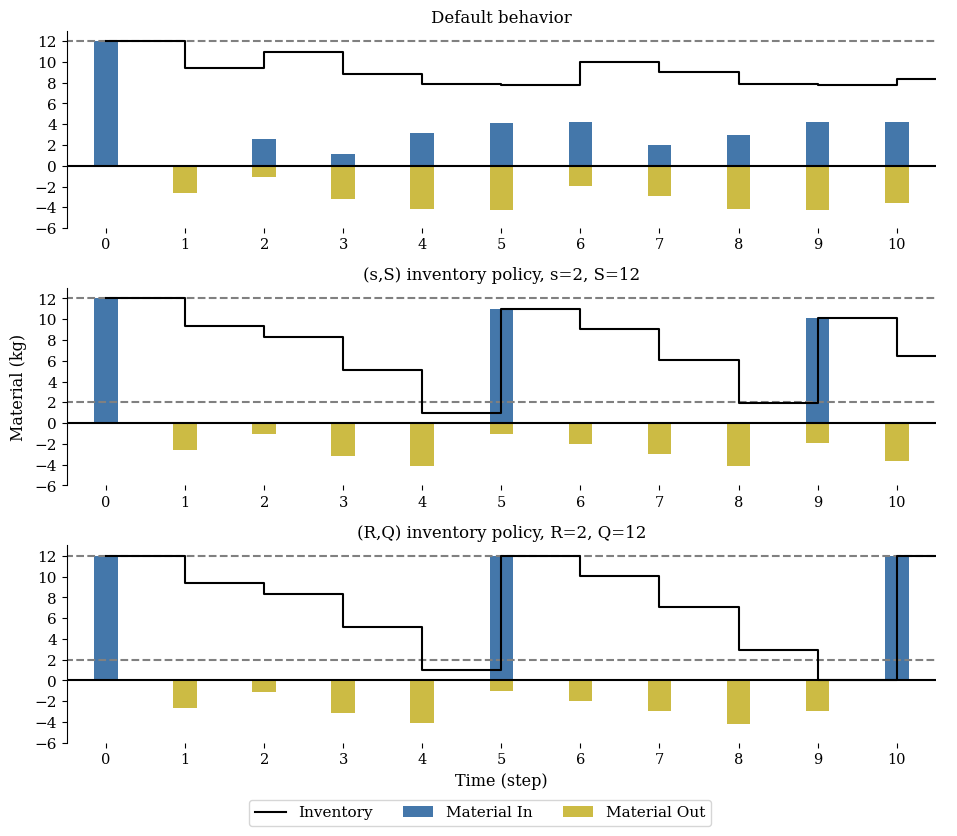

In [56]:
fig = plt.figure(figsize = (10, 9))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Material (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='none', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(311)
# ax0.set_xlabel('Time (step)')
# ax0.set_ylabel('Material (kg)')
plt.xlim(-0.5,10.5)
plt.ylim(-6,13)
ax0.set_xticks(np.arange(0, 11, 1))
ax0.set_yticks(np.arange(-6, 13, 2))

ax0.spines['top'].set_color('none')
ax0.spines['bottom'].set_color('none')
ax0.spines['right'].set_color('none')

ax0.hlines(y=[0,12], xmin=-2,xmax=11, colors=['k', 'gray'], linestyles=['solid', 'dashed'], label='_nolegend_')

ax0.bar(data['no-behavior']['t_r']['Time'],
         data['no-behavior']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax0.set_title('Default behavior')

ax0.bar(data['no-behavior']['t_s']['Time'],
         -data['no-behavior']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)


ax0.step(data['no-behavior']['Net']['Time'],
         data['no-behavior']['Net']['Net'],
         where='post',
         color= 'k')


# #
# # behav in
ax1 = fig.add_subplot(313, sharex=ax0, sharey=ax0)
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax1.spines['right'].set_color('none')

ax1.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'], label='_nolegend_')

ax1.bar(data['R-Q']['t_r']['Time'],
         data['R-Q']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
ax1.set_title('(R,Q) - received')

#
# behav out
ax1.bar(data['R-Q']['t_s']['Time'],
         -data['R-Q']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)
ax1.set_title('(R,Q) - sent')

#
# behav net
ax1.step(data['R-Q']['Net']['Time'],
         data['R-Q']['Net']['Net'],
         where='post',
         color= 'k')

ax1.set_title('(R,Q) inventory policy, R=2, Q=12')

#
# #
# # behav in
ax2 = fig.add_subplot(312, sharex=ax0, sharey=ax0)
ax2.spines['top'].set_color('none')
ax2.spines['bottom'].set_color('none')
ax2.spines['right'].set_color('none')

ax2.hlines(y=[0,2,12], xmin=-2,xmax=11, colors=['k', 'gray', 'gray'], linestyles=['solid', 'dashed', 'dashed'], label='_nolegend_')

ax2.bar(data['s-S']['t_r']['Time'],
         data['s-S']['t_r']['Quantity'],
         color= palette[0],
       label='received',
       width=0.3)
#ax2.set_title('(s,S) - received')

#
# behav out
ax2.bar(data['s-S']['t_s']['Time'],
         -data['s-S']['t_s']['Quantity'],
         color= palette[3],
       label='sent',
       width=0.3)
#ax2.set_title('(s,S) - sent')

#
# behav net
ax2.step(data['s-S']['Net']['Time'],
         data['s-S']['Net']['Net'],
         where='post',
         color= 'k')

ax2.set_title('(s,S) inventory policy, s=2, S=12')

#
#
ax1.legend(['Inventory', 'Material In', 'Material Out'], ncol=3,
           fancybox=True, bbox_to_anchor=(0.75,-0.25))

#fig.suptitle('(R,Q) inventory policy', x=0.515)
fig.tight_layout()

plt.savefig('plots/comparing-default-RQ-sS-diss', transparent=True, dpi=600)


## other

Text(0.55, 0.98, 'Fixed Active and Dormant Periods')

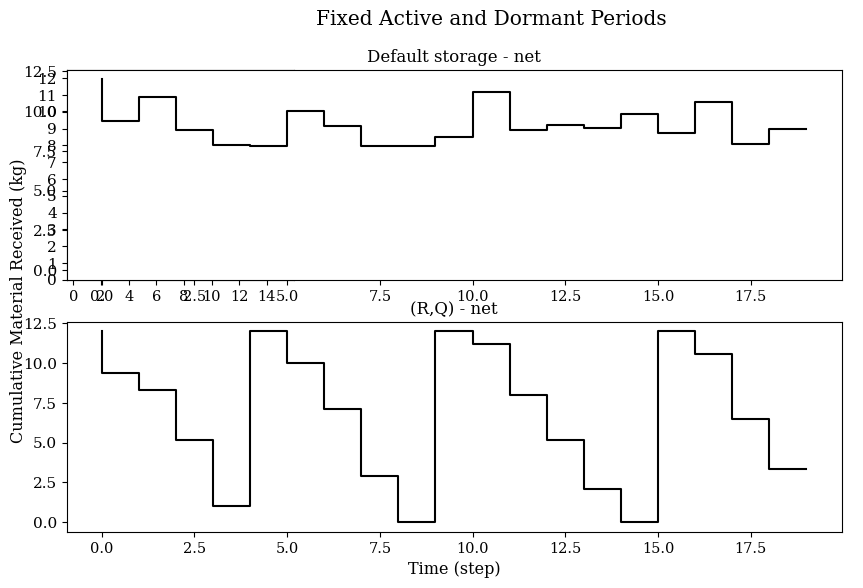

In [29]:
fig = plt.figure(figsize = (10, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

#
# upper left - nobehav in
ax0 = fig.add_subplot(231)
# ax.set_xlabel('Time')
# ax.set_ylabel('Quantity Received')
plt.xlim(-0.5,16)
plt.ylim(0,12.5)
ax0.set_xticks(np.arange(0, 16, 2))
ax0.set_yticks(np.arange(0, 13, 1))

#
# upper right - nobehav out
ax0 = fig.add_subplot(211)

ax0.step(data['no-behavior']['Net']['Time'],
         data['no-behavior']['Net']['Net'],
         color= 'k')
ax0.set_title('Default storage - net')


#
# lower right - behav net
ax4 = fig.add_subplot(212, sharex=ax0, sharey=ax0)

ax4.step(data['R-Q']['Net']['Time'],
         data['R-Q']['Net']['Net'],
         color= 'k')
ax4.set_title('(R,Q) - net')

#
#
#plt.savefig('plots/in-and-out', transparent=True)

fig.suptitle('Fixed Active and Dormant Periods', x=0.55)
#fig.tight_layout()

